<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day5/Day5_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>

# Day 5: Regression Modeling and Assessment
<br>
<br>
<br>

## Day4 Review

### A Simple Method for Calculating a ROC Curve

A ROC curve is formulated by plotting the __true positive rate__ (TPR) (a.k.a., __sensitivity__) against the __false positive rate__ (FPR) (a.k.a, __1 - specificity)__ for a given classifier's actual classifications and scored probabilities. 

The FPR is represented by the X axis while the TPR is represented by the Y axis.

__Remember__:  

- The __true positive rate__ (TPR) is the proportion of actual "positive" classification values that are __correctly identified as "positive"__. This is also known as the __sensitivity__ of a classifier, i.e., TP / (TP + FN)


- The __false positive rate__ (FPR) is the proportion of actual "negative" classification values that are __incorrectly identified as "positive"__. FPR is defined as FP / (FP + TN), which is the same as __1 - specificity__ (remember that specificity = TN/(TN + FP) )


To derive the values required for a ROC plot of a model we __iterate through an ordered sequence of 'K' classification threshold values__ within the range of $(0 < threshold <= 1)$ (e.g., if 'K' == 100, our iterator would span .01 through 1.00 via .01 increments). 

While iterating through the threshold values, we __compare the scored probabilities against each iterative threshold value__ to derive + store TPR and FPR values across the full range of iterable threshold values. When finished, we have accumulated 'K' pairs of TPR and FPR values.

Then, plot the resulting TPR and FPR metrics against one another on a 2-dimensional plane.


In [ ]:
''' 'actual' is the class variable (the actual classification) from the data set
'probability' is the scored.probability variable from the data set '''

# -----------------------------------------------------------------------

    #create list of thresholds
    thresholds = np.arange(0,1,0.01)
    
    #create list of true positive rates
    tpr_list=[]
    
    #create list of false positive rates
    fpr_list=[]
    
    #create new list of predictions for every threshold
    for i in thresholds: #for every threshold
        new_predicted=[] #create new list of predictions
        for j in range(len(probability)): #for each observation
            #compare threshold to probability and append new prediction
            if probability[j] < i:        
                new_predicted.append(0)
            else:
                new_predicted.append(1)
 
        #calculate the tpr
        tpr = sensitivity(actual, pd.Series(new_predicted))
        tpr_list.append(tpr) #append the true positive rate to the list

        #calculate the fpr
        fpr = 1 - specificity(actual, pd.Series(new_predicted))
        fpr_list.append(fpr) #append the false positive rate to the list
        
# ...then continue to formulate your code for plotting tpr_list vs. fpr_list
# via the Python graphics tool of your choice

### Calculating AUC

Once you have derived the data values required for plotting a ROC curve, calculating the area under that curve is a simple matter of applied mathematics / calculus. There are a variety of mathematical approaches for estimating the area under a curve, with two of the most prominent being the trapezoid rule or Reimann sums.

<br>
<br>

# Regression Modeling for Numeric Response Variables

__Regression modeling__ estimates the strength of the relationship between the __"Response" (aka "Dependent") variable__ and one or more __"Explanatory" (aka "Independent") variables__. 

It is used for __predicting the mean numerical value of the response variable__ when given specific values for the explanatory variables.

There are many different types of regression models, and the characteristics of each vary depending on the type of response variable you are attempting to estimate. Some of the most widely used types of regression models for __numerical response variables__ include:

- __Linear Regression__: Used for fitting a linear equation for a __continuous__ numeric response variable. The relationship between the response and explanatory variable(s) is assumed to be __linear__ in nature. The output is a __linear equation__. If there is only one explanatory variable, we use __Simple Linear Regression__. If there is more than one explanatory variable, we use __Multiple Linear Regression__.


- __"Count" Regression__: The response variable contains __non-negative__ (i.e., x >= 0) __discrete__ numeric "count" values while the explanatory variables can be either binary, discrete or continuous. Commonly used regression techniques for modeling count data include __Poisson Regression__ (where the response variable __must__ have a Poisson distribution), __Negative Binomial Regression__ (where the response variable need not have a Poisson distribution), and __Zero-Inflated Negative Binomial Regression__ (used when the response variable contains an excessive number of 'zero' values).


- __Polynomial Regression__: Used when a __non-linear__ relationship exists between a continuous response variable and explanatory variables that are either binary, discrete or continuous. The ouput is a __non-linear__ equation.


\*\* Please note that there are __many__ other types of regression models (e.g., Lasso, Ridge, Partial Least Squares, etc).\*\*

## Linear Regression

Linear regression consists of finding the best fitting straight line through a set of data points. That line is called a __regression line__. An example:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

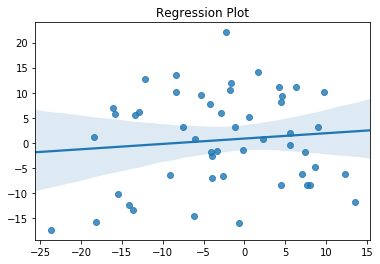

In [ ]:
# generate some random data to use for the plot
x = np.random.randn(50) * 10

y = np.random.randn(50) * 10

# first define a Matplotlib figure
plt.figure()

# use Seaborn's regplot() function to plot the regression line for the 
sns.regplot(x, y)

# give the plot a title using Matplotlib
plt.title('Regression Plot');

Simple linear regression equations take the form of 
$y' = ax + b$ where $y'$ is the predicted value of the response variable for a given value of the explanatory variable $x$, $a$ is the slope of the regression line, $x$ is the value of the explanatory variable and $b$ is a constant representing the y-intercept of the regression line. 

The regression line is created by using the known values of the explanatory variable $x$ and the known values of the response variable $y$ to find the slope $a$ and y-intercept $b$ of the line that minimizes the sum of the squared errors of the predicted values of $y'$. 

We calculate values for the slope $a$ and the y-intercept $b$ using the means and standard deviations of the known values of $x$ and $y$ as well as the correlation coefficient $r$ of $x$ and $y$:

$a = r * stddev(y)/stddev(x) $

$b = f(x=0)$ that is, the expected y when x is 0


A simple linear regression example:

http://onlinestatbook.com/2/regression/intro.html

## Multiple Linear Regression

When using multiple explanatory variables, the regression line __cannot be visualized within a two-dimensional space__. However, it is still relatively easy to compute: the regression line is estimated using the formula

$y' = a + b1x1 + b2x2 + .. +bnxn$


where $y'$ is the predicted value for the response variable for given values of the explanatory variables x1, x2, .., xn, and the $b$ values represent the __independent contributions__ of the corresponding explanatory variable to the prediction of the response variable.  

For those who desire further explanation of the underlying mathematics:

http://www.statsoft.com/Textbook/Multiple-Regression

http://faculty.cas.usf.edu/mbrannick/regression/Reg2IV.html

## Count Regression

Unlike linear regression, __count regression__ is appropriate for models in which the response variable is a __non-negative integer__.  The response variable should follow either a __Poisson distribution__ (i.e., mean == variance) or an __overdispersed distribution__ (i.e., variance > mean).


#### Why not just use some form of linear regression for estimating non-negative integers?

-  The relationship between the explanatory variables and the non-negative integer response variable __are unlikely to be linear__.


-  Linear regression can produce __negative floating point numbers__, which are clearly not valid if the response variable is known to be a non-negative integer.


-  The distribution of the residuals from a linear regression model that has been applied to a non-negative integer response variable __will not be random__.


### Poisson Regression

If your data follows a Poisson distribution, __Poisson Regression__ can be an effective tool for estimating the non-negative integer response variable. The probability mass function (PMF) for a Poisson distribution is:

# $p(X = k) =  \frac{\lambda^k e^{-\lambda}} {k!}$

where $k$ is any non-negative integer, $e$ is the natural exponent $e = 2.71828$, and $\lambda$ is the mean value of the response variable.  (Note that the mean is equivalent to the variance in a Poisson distribution). Using the PMF we can estimate the likelihood of any value within a Poisson distribution. 

Poisson regression incorporates this PMF as it calculates a __Maximum Likelihood Estimation__ for the regression coefficients that maximize the likelihoods of the individual response variable values. 

The output of the algorithm will be the __natural log__ of the count value you are attempting to estimate. Therefore, you must __exponentiate__ the output of the model to determine the actual estimated values for the count variable. 

__How to interpret the model's coefficients__: "For a one unit change in $X_k$, the estimated count changes by a factor of $exp(\beta_k)$, assuming all other variables are held constant." However, in practice it is very common to simply examine the __directionality__ of the coefficients, i.e., if a coefficient is __negative__, then the larger the value of the explanatory variable, the more it will tend to __decrease__ the magnitude of the response variable. Conversely, if a coefficient is __positive__, then the larger the value of the explanatory variable, the more it will tend to __increase__ the magnitude of the response variable.


See this article from the assigned readings for more detail on the underlying mathematics + an example of how to implement Poisson regression in Python: https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958


### Negative Binomial Regression

If your data is __over dispersed__ (i.e, variance > mean), __Negative Binomial Regression__ can be an effective tool for estimating the non-negative integer response variable. The probability mass function (PMF) for a Negative Binomial ("overdispersed") distribution is:

# $p(X = n) =  \frac{(n-1)!} {(r-1)!(n-r)!}p^r (1-p)^{(n-r)}$

where $n$ is the number of attempts, $r$ is the number of successes, and $p$ is the probability of success. For our purposes "probability of success" represents the likelihood that the response variable has been observed having a specific value (e.g., 0 or 1 or 2 or ...).

Negative Binomial regression incorporates this PMF as it calculates a __Maximum Likelihood Estimation__ for the regression coefficients that maximize the likelihoods of the individual response variable values.

As with Poisson regression, the output of the negative binomial regression algorithm will be the __natural log__ of the count value you are attempting to estimate. Therefore, you must __exponentiate__ the output of the model to determine the actual estimated value for the count variable. 

__How to interpret the model's coefficients__: Interpretation of the explanatory variable coefficients is identical to Poisson regression: "For a one unit change in $X_k$, the estimated count changes by a factor of $exp(\beta_k)$, assuming all other variables are held constant." However, in practice it is very common to simply examine the __directionality__ of the coefficients, i.e., if a coefficient is __negative__, then the larger the value of the explanatory variable, the more it will tend to __decrease__ the magnitude of the response variable. Conversely, if a coefficient is __positive__, then the larger the value of the explanatory variable, the more it will tend to __increase__ the magnitude of the response variable.

See this article from the assigned readings for an explanation of how to implement negative binomial regression in Python: https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4


See this article from the assigned readings for an explanation of how to implement __both__ Poisson and Negative Binomial Regression via __Generalized Linear Models__ (GLM's: https://en.wikipedia.org/wiki/Generalized_linear_model) using Python's __statsmodels__ library: 


- https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/#cameron


This article provides a detailed tutorial of how to implement both Poisson and Negative Binomial regression using Generalized Linear Models (GLM’s) via Python's statsmodels library. __It is strongly encouraged to use this tutorial when implementing a count regression model within Python__.


## Polynomial Regression

When a __non-linear__ relationship exists between a continuous response variable and explanatory variables that are either binary, discrete or continuous, a linear regression model is highly unlikely to be an effective model. As an alternative, we can substitute a __polynomial equation__ for the standard linear model. The ouput of such a regression model is a __non-linear__ equation.

__What is a non-linear equation?__ An example:

# $y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 + \beta_3x_i^3 + ... + \beta_dx_i^d + \epsilon_i $

As $d$ (the degree of the polynomial) increases, the "flexibility" of the regression model increases significantly. See the assigned reading for an example: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

__HOWEVER__, this flexibility comes at a cost: we can easily end up with a model having very high variance (i.e., the model __overfits__ the data). A model with very high variance is unlikely to prove to be effective when applied to previously unseen data. 

__THEREFORE__: when using polynomial regression we need to be acutely aware of the __bias vs variance__ tradeoff and work diligently to select a polynomial degree $d$ that strikes a balance between the two.

__It is unusual to use a $d$ of more than 3 or 4__ since using larger values can easily result in overfitting. However, there is no strict limitation on the selection of a value for $d$ so use your empirical skills to help you decide on a value for $d$ that is best suited to the data you are working with.

## Evaluating Regression Model Performance

In __Module 5__ we discussed the following regression model performance metrics:

- $R^2$: Often referred to as "Goodness of fit"; measures how much of the variation in the response variable $y'$ is explained by variation in the explanatory variable(s). In general, __the larger the value of $R^2$, the more accurate the model is__. However, relatively large values of $R^2$ can also be an indication of the model being "overfit" to the training data.


- __Adjusted__ $R^2$: Increases if a new variable added to the model improves the fit of the model by more than would be expected by sheer chance. When comparing two models derived from the same data, models with __higher__ __Adjusted__ $R^2$ scores are preferable to those having relatively lower scores. 


- __AIC__: Akaike Information Criteria is a model selection metric that estimates the relative quality of a statistical model for a given set of data. When comparing two models derived from the same data, models with __lower__ __AIC__ scores are preferable to those having relatively higher scores.


- __BIC__: Bayesian Information Criteria is another model selection metric that estimates the unexplained variation in the response variable relative to the given explanatory variables. __BIC__ also imposes a "complexity" penalty when the number of explanatory variables used is increased.  When comparing two models derived from the same data, models with __lower__ __BIC__ scores are preferable to those having relatively higher scores.


- __F Statistic__: Indicates whether a significant amount of variance in the response variable $y'$ is explained by the model. When comparing two models derived from the same data, models with __higher__ __F Statistic__ scores are preferable to those having relatively lower scores. 


- __Log Likelihood__: A measure of how well a model fits the underlying data. When comparing two models derived from the same data, models with __higher__ __Log Likelihood__ scores are preferable to those having relatively lower scores. 


- __p values__: Measure the statistical significance of the explanatory variables in your model. While you are free to select the significance level on your own, most often 0.05 is used as the maximum bound for significance. As such, if any variable in your model is shown to have a __p value__ that exceeds 0.05, consider removing it from the model to see whether the fit/model selection metrics improve.


- __Root Mean Squared Error (RMSE)__: Average distance of a sample from its observed value to its predicted value. We calculate the RMSE by finding the square root of the average of the squared values of a model's residual values. When comparing two models derived from the same data, models with __lower__ __RMSE__ scores are preferable to those having relatively higher RMSE scores. 


These metrics allow us to assess the efficacy of our regression models. Practitioners should examine such metrics whenever they are readily available (e.g., if the software being used generates them automatically). If such metrics are not readily available as output from a model you are testing, you should consider whether your work requires you to calculate them via some other method as a separate step during your model evaluation work.


### Residual Plots & Examining the "Normality" of Residuals

In addition to the metrics listed above, we can also make use of the __residuals__ of a regression model to help us determine whether or not our models are robust. 

A __residual__ is the difference between the actual value of a response variable for a given observation and the predicted response variable value for that same observation. 

In general, the residuals for __linear regression models__ should be __normally distributed__ and __homoscedastic__ (i.e., their distribution is random across all estimated values and no pattern is emminently obvious). We can assess the residuals of a linear regression model via various types of plots. From your assigned readings (MLPR Ch 15): https://github.com/mattharrison/ml_pocket_reference/blob/master/ch15.ipynb

Note that non-linear models are unlikely to have normally distributed residuals; as such, testing for the normality of residuals of such models is unnecessary. 

# Day5 Assignment

We will be building on the previously done wine data set. Our previous data set: [here](https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv) will be applied to our new set: [here](https://github.com/MatthewFried/Udemy/blob/master/Day5/Day5_Data.csv).

We are looking to model the data set's TARGET attribute, which represents the number of cases of wine that were  purchased by wine distributors subsequent to their sampling each of the wines. Sample cases of wine are used  to provide tasting samples to wine shops and restaurants throughout the USA. Create a model predicts the number of wine cases ordered by  distributors based on the various characteristics of the many wines represented in the data set. The wine  producer is interested in understanding ways in which their own wine offerings can be adjusted to maximize  wine sales. 

Construct and compare/contrast a series of regression models (after completing the  necessary EDA and data prep work) that predict the number of wine cases sold relative to certain  properties/characteristics of the wine.

* Upload the data and store it in a dataframe

* Perform an EDA and any necessary data preparation work

* Use feature selection and/or dimensionality reduction techniques to identify  explanatory variables for inclusion within your models. You may select the features manually via the  application of domain knowledge, use forward or backward selection, or use a different feature  selection method (e.g., decision trees, etc.)

* Construct at least two different Poisson regression models, at least two different negative binomial regression models, and at least two multiple linear regression models,  using different explanatory variables (or the same variables if they have been transformed via different  transformation methods). At times, Poisson and negative binomial models can produce identical  results. Be sure to comment on that if it happens.  

* After training your various models, decide how you will select the “best” regression model from those  you have constructed. For example, are you willing to select a model with slightly lower performance if  it is easier to interpret or less complicated to implement? What metrics will you use to  compare/contrast your models? Evaluate the performance of your models via cross validation using  the training data set. Then apply your preferred model to the evaluation data set and assess how well  it performs on that previously unseen data. 


## **AFTER - Review** 

#### Outliers

- __Is my approach to identifying outliers appropriate for each of the attributes__? Research / develop to gain domain knowledge relative to the data you are working with so that you are well-informed regarding the possible __valid__ data values for each of your attributes.

- __If I remove observations, am I discarding too many observations__ ? If your outlier analysis results in the discarding of a large percentage of the observations contained within a data set, make sure you have a strong set of supporting facts/ domain knowledge that justify your actions.

- __Is there some other method (other than deletion) I can make use of when I have identified a likely outlier__? Think about why the supposed outlying values may be present within the data set: Are they actually valid values? Could they be the result of a data entry or computational error of some sort? Are there similar observations within the data set? Can we preserve otherwise valid data via the use of a well-founded imputation of a new value for the supposed outlier? etc.

- __Is there a legitamite reason the data is missing?__  For example, the STARS variable had a significant number of "missing" data values. However, use of domain knowledge would tell us that not every wine available for sale actually has a STARS rating: only wines that have been reviewed by so-called "experts" who are qualified to assign STARS ratings will actually receive a STARS rating. Therefore, the lack of a STARS rating is __very__ likely to be indicative of the fact that a wine simply has not been assessed for a STARS rating as of yet, and the lack of a STARS value is, in fact, __valid__ within the context of this data set.

<br>
</br>

#### Imputation

Avoid mean, median, or mode for imputation (if you can) since it will likely alter the shape of the probability density function of an attribute __unless the number of missing values is very small__. Use of a mean or median or mode should be reserved solely for instances of when no other method proves viable (e.g., no statistically significant imputation model can be identified for the attribute) or when we have a very small number of missing data values (e.g., less than 1%).

<br>
</br>

#### Discuss + explain your model coefficients

The "directionality" of model coefficients can provide a great deal of information we can use to help explain a model to others. Therefore, we should __always__ review and discuss the directionality of our model coefficients for purposes of explaining to others the effects that various explanatory variables have upon our response variable.

<br>
</br>

#### The Actual Analysis

The response variable is actually __under-dispersed__ due to all of the zeroes contained within the TARGET variable. When data is underdispersed AND we have a large volume of zeroes in our response variable, __a zero-inflated model is likely to be the most effective type of model to use__. As such, we could apply a zero-inflated Poisson or zero-inflated negative binomial model to the data (NOTE: Python lacks a reliable zero-inflated negative binomial algorithm. However, a ready-made zero-inflated Poisson algorithm can be found [here](https://austinrochford.com/posts/2015-03-03-mle-python-statsmodels.html ).

<br>
</br>

#### Linear regression

__Linear regression models can generate negative non-whole values__. Since our response variable was a cardinal non-negative integer, use of a linear regression model would not be appropriate for purposes of estimating the number of cases of wine likely to be sold.